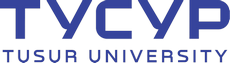


**Цифровая академия ТУСУР**

**Практикум для закрепления навыков**

Данный ноутбук необходим для прохождения [тренажера](https://https://it-lms.tusur.ru/mod/quiz/view.php?id=269), завершающего модуль "Методы работы с данными". 


Дополните ячейку ниже всеми библиотеками, упомянутыми в первом вопросе. Для удобства лучше присвоить им краткие имена.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Загрузите данные с помощью следующего кода

In [ ]:
%%capture
!wget https://www.dropbox.com/s/04y77oljolgvrel/signals0.xlsx

Запишите файл signals0.xlsx в DataFrame с названием data.

In [ ]:
data = pd.read_excel('signals0.xlsx')

In [ ]:
data.sample(5)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,Class
37,4658.029297,6574.356934,35055.04688,0.003001,29.057964,173.956711,0.000000,1880.328003,0.243506,4077.699951,7072.046387,42748.21484,0.002627,22.920607,203.672226,0.029648,1051.399536,0.097403,1
12,4459.272949,6704.931641,34887.70703,0.000000,24.456684,183.235184,0.000000,1419.233887,0.283333,3073.022705,5624.226562,27466.66602,0.005420,18.566181,211.169724,0.154702,503.053497,0.094156,1
99,5494.901855,7383.454102,34525.81641,0.160170,22.932573,163.961487,0.020830,1363.945068,0.345048,4835.181641,7298.878906,65831.03125,0.001767,19.412266,206.746628,0.072613,668.304810,0.105960,2
93,4330.762695,6866.930176,32248.78320,0.000705,18.892572,173.744415,0.000000,1322.716919,0.142384,4409.736328,6258.135742,30506.35547,0.000000,20.787725,208.606735,0.117013,746.264465,0.252366,2
339,4190.510254,6861.245117,34315.97656,0.008315,28.080704,174.742615,0.019667,1655.101685,0.274760,4158.803711,7495.993652,30258.29297,0.288591,19.471060,119.366447,0.069764,449.672760,0.138889,1


Определите размерность данных - количество экземпляров (строк) и столбцов.

In [ ]:
data.shape

(474, 19)

Изучите содержимое целевой переменной

In [ ]:
data['Class'].unique()

array([1, 2])

Рассчитайте коэффициент дисбаланса IR

In [ ]:
counts = data['Class'].value_counts()
IR = counts[1]/counts[2]
IR

1.0

Определите, имеются ли пропуски в данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a0      474 non-null    float64
 1    a1     474 non-null    float64
 2    a2     474 non-null    float64
 3    a3     473 non-null    float64
 4    a4     474 non-null    float64
 5    a5     474 non-null    float64
 6    a6     471 non-null    float64
 7    a7     474 non-null    float64
 8    a8     474 non-null    float64
 9    a9     474 non-null    float64
 10   a10    474 non-null    float64
 11   a11    474 non-null    float64
 12   a12    472 non-null    float64
 13   a13    474 non-null    float64
 14   a14    474 non-null    float64
 15   a15    473 non-null    float64
 16   a16    474 non-null    float64
 17   a17    474 non-null    float64
 18  Class   474 non-null    int64  
dtypes: float64(18), int64(1)
memory usage: 70.5 KB


Подсчитайте количество пропущенных значений в каждом признаке

In [ ]:
data.isna().sum()

a0       0
 a1      0
 a2      0
 a3      1
 a4      0
 a5      0
 a6      3
 a7      0
 a8      0
 a9      0
 a10     0
 a11     0
 a12     2
 a13     0
 a14     0
 a15     1
 a16     0
 a17     0
Class    0
dtype: int64

Заполните все пропуски значением 0.0 и проверьте, остались ли пропуски в данных

In [ ]:
data = data.fillna(0.0)
data.isna().sum()

a0       0
 a1      0
 a2      0
 a3      0
 a4      0
 a5      0
 a6      0
 a7      0
 a8      0
 a9      0
 a10     0
 a11     0
 a12     0
 a13     0
 a14     0
 a15     0
 a16     0
 a17     0
Class    0
dtype: int64

Выведите описательные статистики набора данных

In [ ]:
data.describe(include = "all")

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,Class
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,4422.699186,6691.355522,34679.590323,0.103091,24.669193,179.033497,0.022016,1632.135726,0.238801,4113.931278,7007.017678,43988.364217,0.362934,21.428342,199.183077,0.078938,818.923045,0.135239,1.500000
std,699.419476,756.960068,3017.845347,0.537509,2.720440,5.733267,0.026777,202.981072,0.043766,1113.025633,1146.836377,13530.229233,6.325774,3.839463,22.521546,0.091289,336.926352,0.054559,0.500528
min,3001.416748,4713.786621,26806.798830,0.000000,18.185061,161.884308,0.000000,1045.786255,0.119741,1605.269653,3081.984131,18459.683590,0.000000,16.618671,110.383484,0.000000,381.860565,0.011321,1.000000
25%,3913.527100,6229.683105,32749.301267,0.001231,22.958566,175.560989,0.002563,1477.695251,0.211585,3464.032227,6167.486694,33805.551760,0.000020,19.565250,195.419826,0.000000,637.903076,0.097093,1.000000
50%,4333.641357,6699.021241,34593.449220,0.008315,24.447506,179.185822,0.015171,1642.177368,0.241379,4008.057618,6918.586182,41759.447265,0.002301,20.679366,206.248726,0.077633,754.834351,0.133753,1.500000
75%,4767.759155,7176.352173,36152.958010,0.036413,26.449736,183.032673,0.031211,1764.706299,0.267296,4718.469238,7497.323731,47605.816410,0.024451,22.047527,212.937836,0.096987,867.150574,0.163009,2.000000
max,7986.296387,9085.962891,50293.796880,9.052477,33.421333,203.759109,0.260196,2327.326416,0.402597,13083.335940,10762.631840,89040.234380,137.306961,40.029259,233.955704,0.738292,2371.504395,0.442073,2.000000


Проведите мини-максную нормализацию данных. В ячейке ниже вместо ??? вставьте необходимый код

In [ ]:
from sklearn import preprocessing
X = data.drop('Class', 1)   # отделим признаки от целевой переменной
feature_names = X.columns
transformer = preprocessing.MinMaxScaler()   # инициализируем класс для нормализации данных. Воспользуемся мини-максной нормализацией
transformer.fit(X)   # обучение "трансформера" заключается в нахождении экстремумов признаков
X = transformer.transform(X)   # проведем нормализацию данных
y = data['Class']   # получим целевую переменную
data = pd.DataFrame(X, columns = feature_names)   # соберем DataFrame из нормализованных признаков
data = data.join(y)   # объединим целевую переменную с нормализованными признаками
data.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,Class
0,0.104284,0.350687,0.170102,0.001561,0.564460,0.351424,0.008186,0.574316,0.460513,0.136865,0.522924,0.398259,4.894144e-06,0.199148,0.921034,0.212375,0.211576,0.126546,1
1,0.220158,0.301623,0.322004,0.002523,0.547677,0.154471,0.326523,0.310120,0.543895,0.099820,0.414264,0.362705,0.000000e+00,0.232301,0.829914,0.012458,0.280510,0.266655,1
2,0.171155,0.397817,0.336469,0.000028,0.360042,0.454068,0.035754,0.449431,0.482889,0.125923,0.451347,0.309411,1.893568e-07,0.249163,0.914593,0.000000,0.309462,0.114193,1
3,0.214209,0.487273,0.228827,0.000019,0.345968,0.411506,0.082319,0.318838,0.457759,0.086193,0.508704,0.506626,0.000000e+00,0.595482,0.994067,0.498037,0.843869,0.320862,1
4,0.221240,0.511448,0.410361,0.000523,0.282431,0.629780,0.000000,0.396203,0.335047,0.148589,0.387760,0.237361,4.857729e-06,0.064917,0.699412,0.098984,0.090984,0.360639,1


Импортируем библиотеки, необходмые для построения классификаторов

In [ ]:
from sklearn.ensemble import AdaBoostClassifier   # импорт алгоритма для построения леса деревьев решений
from sklearn.neural_network import MLPClassifier   # импорт алгоритма для построения простейшей нейронной сети
from sklearn.metrics import make_scorer   # метод, полезный для получения оценок модели при использовании кросс-валидации
from sklearn.metrics import accuracy_score   # метрика общей точности
from sklearn.model_selection import cross_validate   # метод, необходмый для проведения кросс-валидации
from sklearn.model_selection import StratifiedKFold   # алгоритм кросс-валидации
X = data.drop('Class', 1)
y = data['Class']

Обучите модели и замерьте их точность

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(random_state=42)    
result = cross_validate(estimator=mlp.fit(X, y),
                            X=X, y=y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность классификатора = 75.11%


In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
trees = AdaBoostClassifier(n_estimators=50)    
result = cross_validate(estimator=trees.fit(X, y),
                            X=X, y=y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 91.77%


Разбейте данные на обучающую и тестовую части в отношении 80:20 при помощи кода ниже.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24, shuffle=True, stratify=y)

Постройте матрицы ошибок для обоих классификаторов

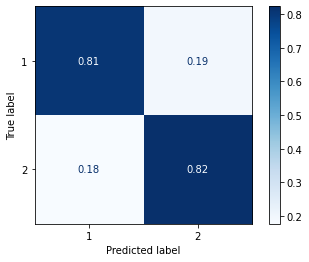

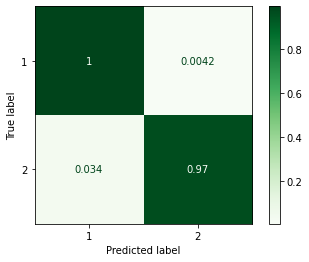

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X,
        y,
        cmap=plt.cm.Blues,
        normalize='true')
disp = ConfusionMatrixDisplay.from_estimator(
        trees,
        X,
        y,
        cmap=plt.cm.Greens,
        normalize='true')

Сгенерируйте диаграмму разброса для переменной X

In [ ]:
import plotly.express as px
fig = px.box(X, points="all")
fig.show()

Импортируйте нужные для отбора признаков методы

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Обучите фильтр и получите сокращенное подмножество признаков из 10 переменных. В ячейке ниже вместо ??? вставьте нужный код

In [ ]:
filter = SelectKBest(chi2, k=10).fit(X, y) # обучаем фильтр
X_new = filter.fit_transform(X, y) # сокращаем данные
print(X_new.shape)
feature_names_short = filter.get_feature_names_out(X.columns) # сохраняем названия отобранных признаков
print(feature_names_short)

(474, 10)
['a0' ' a1' ' a3' ' a9' ' a11' ' a12' ' a13' ' a15' ' a16' ' a17']


Соберите DataFrame из сокращенного набора. Достаточно только матрицы с признаками, целевая переменная уже готова.

In [ ]:
X_new = pd.DataFrame(X_new, columns=feature_names_short)
X_new.head()

,a0,a1,a3,a9,a11,a12,a13,a15,a16,a17
0,0.104284,0.350687,0.001561,0.136865,0.398259,4.894144e-06,0.199148,0.212375,0.211576,0.126546
1,0.220158,0.301623,0.002523,0.099820,0.362705,0.000000e+00,0.232301,0.012458,0.280510,0.266655
2,0.171155,0.397817,0.000028,0.125923,0.309411,1.893568e-07,0.249163,0.000000,0.309462,0.114193
3,0.214209,0.487273,0.000019,0.086193,0.506626,0.000000e+00,0.595482,0.498037,0.843869,0.320862
4,0.221240,0.511448,0.000523,0.148589,0.237361,4.857729e-06,0.064917,0.098984,0.090984,0.360639


Обучите классификаторы на сокращенном наборе данных.

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(random_state=42)    
result = cross_validate(estimator=mlp.fit(X, y),
                            X=X_new, y=y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Точность классификатора = 68.57%


In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
trees = AdaBoostClassifier(n_estimators=50)    
result = cross_validate(estimator=trees.fit(X, y),
                            X=X_new, y=y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 91.35%


Задание выполнено. Вы великолепны!